# Market Research - Small Robot-Run cafe in Los Angeles

 ## Contents <a id='back'></a>
 * [Introduction](#intro)
     * [Project Puropse](#project_puropse)
     * [Data Description](#data_description)
     * [Task decomposition](#data_transformation)
 * [Open the data file](#open_the_data_file)
     * [Data Quality Assessment](#data_quality_assessment)
 * [Prepare the data](#prepare_the_data)
     * [Replace the column names](#replace_the_column_names)
     * [Address Missing Data](#address_missing_data)
 * [Analyze the data](#analyze_the_data)
 * [General conclution](#general_conclution)

## Introduction <a id='data_review'></a>

Market Research Analytics on using open-source data on restaurants in LA.

### Project Puropse

Analytics prepared with the purpose of attracting investors, to inform on the current market conditions answering the question:

**Will you be able to maintain your success when the novelty of robot waiters wears off?**


### Data Description

- rest_data table:
    - `object_name` — establishment name
    - `chain` — chain establishment (TRUE/FALSE)
    - `object_type` — establishment type
    - `address` — address
    - `number` — number of seats
    
### **Task decomposition:** <a id='data_review'></a>
- Part 1. Download the data and prepare it for analysis
- Part 2. Data analysis
- Part 3. Preparing a presentation

# Part 1. Download the data and prepare it for analysis

## Initialization

In [5]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

## Open the data file and study the general information## Open the data file and study the general information

In [6]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/rest_data_us.csv')

In [7]:
df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [8]:
# obtaining general information about the data in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [9]:
# Rename columns
df = df.rename(columns={
    'id': 'id',
    'object_name': 'establishment_name',
    'address': 'address',
    'chain': 'chain',
    'object_type': 'establishment_type',
    'number': 'seats'
})

df

,id,establishment_name,address,chain,establishment_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [10]:
# Counting clear duplicates in the DataFrame df_order
print('Duplications in DataFrame df_order:', df.duplicated().sum())

Duplications in DataFrame df_order: 0


In [11]:
# view the rows with missing values
rows_with_missing_values = df[df['chain'].isnull()]
rows_with_missing_values

,id,establishment_name,address,chain,establishment_type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [12]:
# Make the Nan values 'unknown'
df['chain'].fillna('unknown', inplace=True)

In [13]:
# obtaining general information about the data in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  9651 non-null   int64 
 1   establishment_name  9651 non-null   object
 2   address             9651 non-null   object
 3   chain               9651 non-null   object
 4   establishment_type  9651 non-null   object
 5   seats               9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


**Data Quality Assesment** 

- The initial Data Quality Assesment indicated that the data does not contain any dupliations
- There are 3 missing values in chain column that have been changed from Nan to unknown

# Part 2. Data analysis


**This Data analysis will include:**

- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
- Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain. 

In [14]:
df.head(0)

,id,establishment_name,address,chain,establishment_type,seats


## Investigate the proportions of the various types of establishments. Plot a graph.

In [15]:
unique_establishment_types = df['establishment_type'].nunique()
print("Number of unique establishment types:", unique_establishment_types)

Number of unique establishment types: 6


In [16]:
# Count unique establishment types
establishment_type_counts = df['establishment_type'].value_counts()
establishment_type_counts

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: establishment_type, dtype: int64

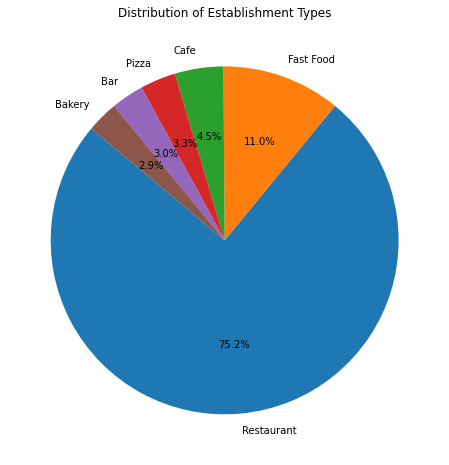

In [17]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(establishment_type_counts, labels=establishment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Establishment Types')
plt.show()

## Investigate the proportions of chain and nonchain establishments. Plot a graph.

In [18]:
# Count unique chain types
chain_type_counts = df['chain'].value_counts()
chain_type_counts

False      5972
True       3676
unknown       3
Name: chain, dtype: int64

In [19]:
# Display unique chain types and their counts
print("Unique Chain Types:")
for chain_type, count in chain_type_counts.items():
    print(f"{chain_type}: {count}")

Unique Chain Types:
False: 5972
True: 3676
unknown: 3


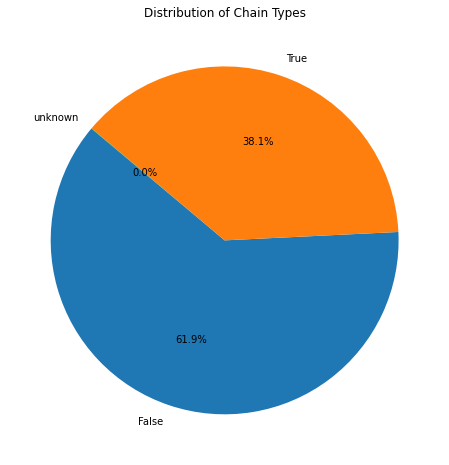

In [20]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(chain_type_counts, labels=chain_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Chain Types')
plt.show()

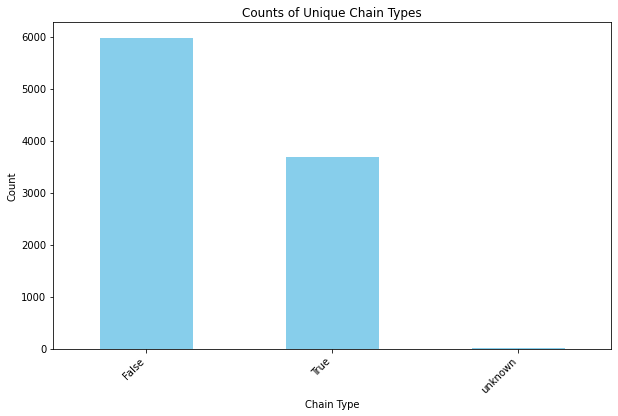

In [21]:
# Create bar graph
plt.figure(figsize=(10, 6))
chain_type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Unique Chain Types')
plt.xlabel('Chain Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Which type of establishment is typically a chain?

In [22]:
cross_table = pd.crosstab(df['chain'], df['establishment_type'])

print("Cross-Tabulation Comparission of Chain and Establishment Type:")
cross_table

Cross-Tabulation Comparission of Chain and Establishment Type:


establishment_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant
chain,,,,,,
False,0,215,169,461,166,4961
True,283,77,266,605,153,2292
unknown,0,0,0,0,1,2


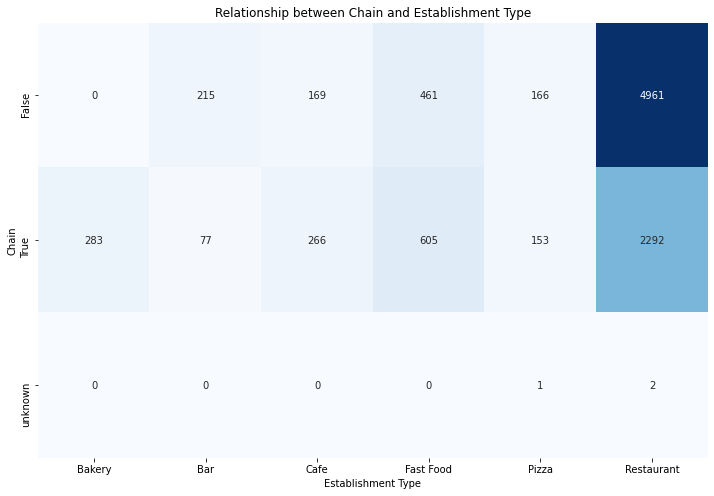

In [23]:
# heatmap for cross table
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Relationship between Chain and Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Chain')
plt.show()

## What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [24]:
#Group all the chain columns that are true
chain_true_df = df[df['chain'] == True]
chain_true_df

,id,establishment_name,address,chain,establishment_type,seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [25]:
# statistical information about the 'seats' column
seats_description = chain_true_df['seats'].describe()
seats_description

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: seats, dtype: float64

In [26]:
#Group all the chain columns that are false
chain_false_df = df[df['chain'] == False]
chain_false_df

,id,establishment_name,address,chain,establishment_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9644,21430,LA BUFADORA BAR,3470 E 1ST ST,False,Bar,24
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93


In [27]:
# statistical information about the 'seats' column
fseats_description = chain_false_df['seats'].describe()
fseats_description

count    5972.000000
mean       46.171467
std        49.875746
min         1.000000
25%        14.000000
50%        28.000000
75%        47.000000
max       229.000000
Name: seats, dtype: float64

**General Conclution**

Chains are characterizes by few establishments with a lot of seats.

## Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [28]:
# Calculate average seats by establishment type
average_seats_by_type = df.groupby('establishment_type')['seats'].mean().reset_index()
average_seats_by_type

,establishment_type,seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


In [29]:
# Sort in descending order
average_seats_by_type = average_seats_by_type.sort_values(by='seats', ascending=False)
average_seats_by_type

,establishment_type,seats
5,Restaurant,48.042316
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.459375
2,Cafe,25.000000
0,Bakery,21.773852


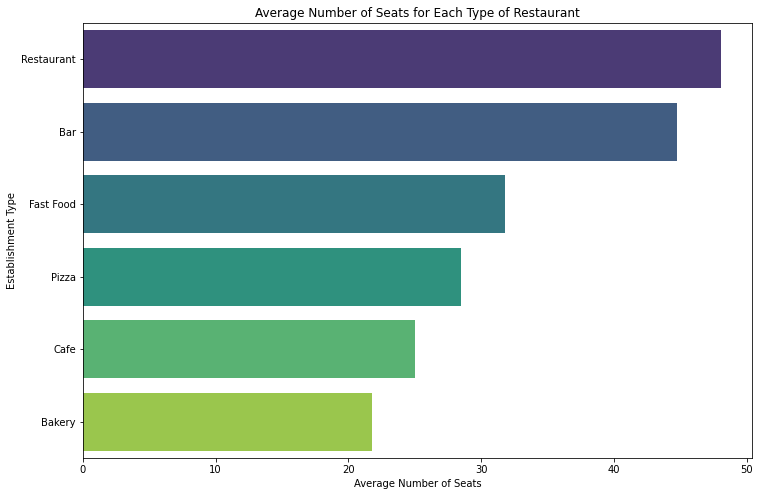

In [30]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='seats', y='establishment_type', data=average_seats_by_type, palette='viridis')
plt.title('Average Number of Seats for Each Type of Restaurant')
plt.xlabel('Average Number of Seats')
plt.ylabel('Establishment Type')
plt.show()


## Put the data on street names from the address column in a separate column.


In [31]:
df.head(5)

,id,establishment_name,address,chain,establishment_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [32]:
# create a sepaate column for the street name
df['street_name'] = df['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Remove 'w', 's', 'e', 'n' followed by a space at the beginning of each street name
df['street_name'] = df['street_name'].str.replace(r'^(w |s |e |n )', '', case=False)

# Remove '#' and numbers from the 'street_name' column
df['street_name'] = df['street_name'].str.replace(r'#\s*\d+', '', regex=True)

# Remove 'ste' and numbers or letters at the end of each street name
df['street_name'] = df['street_name'].str.replace(r'ste\s*\w*$', '', regex=True)

# Display DataFrame
df

/tmp/ipykernel_104/2608128538.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['street_name'] = df['street_name'].str.replace(r'^(w |s |e |n )', '', case=False)


,id,establishment_name,address,chain,establishment_type,seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,SPRING ST STE 100


In [33]:
# viewing unique street names
df["street_name"].sort_values().unique()

array(['1/2 3RD ST', '1/2 7TH ST', '1/2 BEVERLY BLVD', ..., 'pico BLVD',
       'sunset BLVD', 'vine ST '], dtype=object)

In [34]:
# Get unique values in the 'street_name' column
unique_street_names = df['street_name'].unique()

# Display the result
print(unique_street_names)

['EAGLE ROCK BLVD' 'WORLD WAY ' 'HOLLYWOOD BLVD ' ... 'TEMPLE AVE'
 'SPRING ST STE 100' 'SAN PEDRO ST STE 111']


In [35]:
# Display the DataFrame with the 'street_name' column
df['street_name']


0            EAGLE ROCK BLVD
1                 WORLD WAY 
2            HOLLYWOOD BLVD 
3                SUNSET BLVD
4              ECHO PARK AVE
                ...         
9646              TEMPLE AVE
9647             MELROSE AVE
9648          HOLLYWOOD BLVD
9649       SPRING ST STE 100
9650    SAN PEDRO ST STE 111
Name: street_name, Length: 9651, dtype: object

In [36]:
# Get all values in the 'street_name' column
all_street_names = df['street_name'].tolist()

# Display the result
print(all_street_names)

['EAGLE ROCK BLVD', 'WORLD WAY ', 'HOLLYWOOD BLVD ', 'SUNSET BLVD', 'ECHO PARK AVE', 'NATIONAL BLVD', 'WORLD WAY ', '6TH ST STE 226', 'SAN FERNANDO RD UNIT 103', 'CAHUENGA BLVD', 'SUNSET BLVD', 'WESTERN AVE STE 109', '6TH ST STE 101', 'SLAUSON AVE', 'SUNSET BLVD #A', 'WESTERN AVE STE 300', 'WILSHIRE BLVD', 'OXFORD AVE ', 'MELROSE AVE', 'WORLD WAY', '6TH ST STE ', '6TH ST STE ', 'WILSHIRE BLVD', 'WALL ST STE 123', 'MELROSE AVE', 'SAN VICENTE BLVD', 'INDIANA ST', 'LA CIENEGA BLVD', '3RD ST', 'ALVARADO ST STE 111C', '3/4 WALL ST', 'SUNSET BLVD', 'WESTERN AVE', 'SUNSET BLVD', 'SUNSET BLVD', 'SUNSET BLVD STE 150', 'SAN VICENTE BLVD', 'SUNSET BLVD', 'GLENDALE BLVD', 'FIGUEROA ST', 'GRAND AVE STE 101', 'SUNSET BLVD', 'LA CIENEGA BLVD', 'PICO BLVD', 'FIGUEROA ST', 'WORLD WAY LVL6 SP5', 'WORLD WAY', 'OLYMPIC BLVD', 'FLOWER ST STE #B420', 'VINE ST', '5TH ST ', 'OLYMPIC BLVD', 'GRAND AVE', '1ST ST', 'HOPE ST', 'HOLLYWOOD BLVD', 'WORLD WAY', 'SUNSET BLVD', 'MATEO ST', 'KNOX AVE', 'AIRPORT BLVD', '

## Plot a graph of the top ten streets by number of restaurants.


In [37]:
# Get unique values and their counts
unique_street_names = df['street_name'].value_counts()

# Display the result
print(unique_street_names)

SUNSET BLVD              322
PICO BLVD                311
FIGUEROA ST              221
VERMONT AVE              210
WESTERN AVE              192
                        ... 
HOLLYWOOD BLVD B           1
WESTWOOD PLZ A260          1
STA MON BLVD STE FC-8      1
WESTWOOD BLVD STE 1G       1
MAPLE AVE                  1
Name: street_name, Length: 2249, dtype: int64


In [38]:
# Display the top 10 street names and their counts
top_10_street_names = unique_street_names.head(10)
print(top_10_street_names)

SUNSET BLVD       322
PICO BLVD         311
FIGUEROA ST       221
VERMONT AVE       210
WESTERN AVE       192
OLYMPIC BLVD      184
HOLLYWOOD BLVD    176
3RD ST            169
WILSHIRE BLVD     168
BEVERLY BLVD      161
Name: street_name, dtype: int64


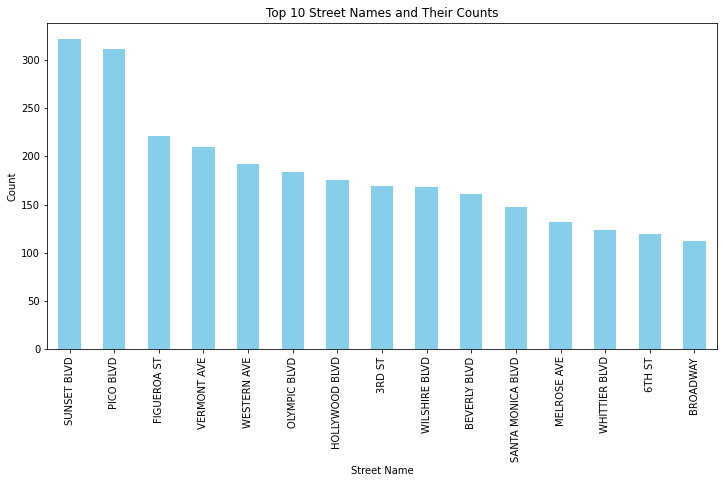

In [39]:
# Get unique values and their counts in the 'street_name' column
unique_street_names = df['street_name'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
unique_street_names[:15].plot(kind='bar', color='skyblue')
plt.title('Top 10 Street Names and Their Counts')
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.show()

## Find the number of streets that only have one restaurant.


In [40]:
# Filter the DataFrame for restaurants
restaurants_df = df[df['establishment_type'] == 'Restaurant']

# Count the number of unique streets with only one restaurant
streets_with_one_restaurant = restaurants_df['street_name'].value_counts()
streets_count = sum(streets_with_one_restaurant == 1)

print(f"Number of streets with only one restaurant: {streets_count}")


Number of streets with only one restaurant: 1376


## For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?


In [41]:
# etermine the threshold 
threshold = 150

# Group the data by 'street_name'
grouped_by_street = df.groupby('street_name')

# Filter the grouped data to include only streets with more than the threshold
streets_with_a_lot_of_restaurants = grouped_by_street.filter(lambda x: len(x) > threshold)

# display the new DataFrame
streets_with_a_lot_of_restaurants

,id,establishment_name,address,chain,establishment_type,seats,street_name
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,SUNSET BLVD
16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE BLVD
22,11808,CAMY'S GRILL,3339 WILSHIRE BLVD,False,Restaurant,39,WILSHIRE BLVD
28,11814,BEVERLY FALAFEL,8508 W 3RD ST,False,Restaurant,31,3RD ST
...,...,...,...,...,...,...,...
9619,21405,HOUSE OF CURRY,1888 S WESTERN AVE,False,Restaurant,21,WESTERN AVE
9626,21412,CHICKEN KABOO MEDITERRANEAN GRILL,4729 E OLYMPIC BLVD,False,Restaurant,40,OLYMPIC BLVD
9628,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,PICO BLVD
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,WESTERN AVE


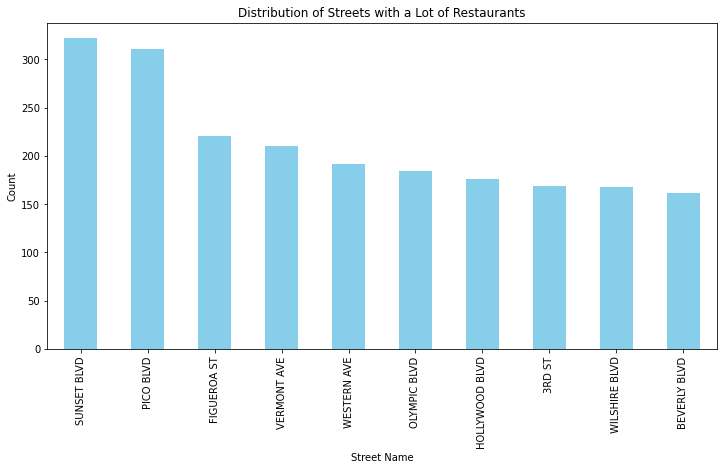

In [42]:
# Graph the 'street' column
plt.figure(figsize=(12, 6))
streets_with_a_lot_of_restaurants['street_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Streets with a Lot of Restaurants')
plt.xlabel('Street Name')
plt.ylabel('Count')
plt.show()


## Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain. 

Current make up of Restaurants in Los Angeles

**Chain Restaurants:**
* 38,1% are chain restaurants
* 61.9% are not chain restaurants

**Which Establishments are mostly Chains**

* 2292 restaurants
* 605 fast food
* 283 bakery
* 266 café 
* 153 pizza
* 77 bar
* 4961 are not chains


#### **The streets with lots of restaurants have lots of seats. These Restaurants tend to be sit-in which means that people want to be served by people**


#### Will a small robot run cafe be able to maintain its success when the novelty of robot waiters wears off?

Only in smaller simpler streets with less restaurants and not as a chain

# Part 3. Preparing a presentation

- Presentation: <https://drive.google.com/file/d/1lfEnEni_2Ty84kGpPRaFA8meNS0RIvNO/view?usp=drive_link> 